# Project 12: Evidence-Based Gambling

<h1 style="position: absolute; display: flex; flex-grow: 0; flex-shrink: 0; flex-direction: row-reverse; top: 60px;right: 30px; margin: 0; border: 0">
    <style>
        .markdown {width:100%; position: relative}
        article { position: relative }
    </style>
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" style="width:100px" />
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" style="width:100px" />
</h1>
<h2 style="height: 10px">
</h2>

*[CEGM1000 MUDE](http://mude.citg.tudelft.nl/): Week 2.8. Friday January 18, 2024.*

## Introduction

In this exercise we evaluate the data from previous Ice Classic years to check the quality of our break-up prediction.

To avoid becoming mindless [gamblers](https://www.youtube.com/watch?v=7hx4gdlfamo), we should try to include some logic in our break-up prediction---luckily we spent the last 16 weeks learning to do just that!

We have provided all the code you need to complete the analyses here, which does the following:
1. Defines functions to help with the analysis
2. Imports data and prepares it for use with the functions
3. Illustrates how the functions can be used to fit a distribution and compute probabilities for break-up occurring in specific increments of time (assuming the Normal distribution)

The time information can be used in three ways (illustrated below), each of which can be interpreted as random variables. The data for these three random variables are processed as follows for all break-up observations:
1. minutes from April 1, 00:00 (e.g., 2000 corresponds to April, 2 at 09:20)
2. minutes during any day (e.g., 875 corresponds to 14:35)
3. days from April 1 (e.g., 16 corresponds to April 16)

The basic unit is decimal minutes (type float) from a specific `reference_date`. The documentation and code below also tries to follow two conventions:
1. The three time-related units use function and variable names `date` `time` and `day`, repsectively
2. In the functions, `minute` is the time (e.g., the MM part of a time HH:MM), wherease `minutes` (note the `s`) is a `float` representation of time in unit of decimal minutes

Read through the code, to get an idea of what it is doing, then use the functions (and examples) provided to make the necessary computations.

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Task 0:</b>  

Read the documentation, code and examples provided. Functions are defined first, then examples.
</p>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.stats import norm
from datetime import datetime, timedelta
import calendar

A `reference_date` is used to find the relative time for each year, with midnight prior to the morning of April 1 set as default.

In [2]:
reference_date = datetime(year=2024, month=4, day=1, hour=0, minute=0)

def minutes_to_date(minutes):
    '''From minute, print the day and time.
    
    Indicates month, day, hour and time given a minute difference
    with respect to the 1st April.
    Does the opposite of date_to_minutes()
    Convention: minute is the str/int and minutes is the float.
    - Input: float with difference in minutes
    - Output: print corresponding month, day, hour and minute.
    '''
    new_date = reference_date + timedelta(minutes=minutes)
    month_name = calendar.month_name[new_date.month]
    
    return print(f"{minutes:.1f} minutes corresponds to:",
                 f"{month_name} {new_date.day}",
                 f"at {new_date.hour}:{new_date.minute}.")


def date_to_minutes(month, day, hour, minute, return_float=False):
    '''From the day and time (str or int), return minutes (float).
    
    Indicates minute difference wrt 1st April given 4 strings
    that specify with month, day, hour, minute.
    Does the opposite of minutes_to_date()
    Convention: minute is the str/int and minutes is the float.
    - Input: 4x str or int: month, day, hour, minute
    - Output: float of minutes of difference wrt 1st April.
    
    '''
    month = int(month)
    day = int(day)
    hour = int(hour)
    minute = int(minute)

    new_date = datetime(year=2024, month=month, day=day, hour=hour, minute=minute)
    minutes = (new_date - reference_date).total_seconds() / 60
    
    if return_float:
        return minutes
    else:
        return print(f"Month {month} day {day} at time {hour}:{minute}",
                     f" corresponds to: {minutes} minutes.")

def minutes_to_time(minutes):
    '''Print hours and minutes in a day given total minutes (float).
    
    Does the opposite of time_to_minutes()
    Convention: minute is the str/int and minutes is the float.
    - Input: float of minutes.
    - Output: print with corresponding hour and minutes.
    '''
    hour = minutes // 60
    minute = minutes % 60
    return print(f"{minutes:.1f} minutes corresponds to time",
                 f"{hour}:{minute}.")

def time_to_minutes(hour, minute, return_float=False):
    '''Prints minutes in a day given hour and minute (str or int).
    
    Does the opposite of minutes_to_time()
    Convention: minute is the str/int and minutes is the float.
    - Input: str or int of hour and minute.
    - Output: print with corresponding minutes.
    '''
    hour = int(hour)
    minute = int(minute)
    minutes = hour*60 + minute

    # return print(f"The number of minutes passed in the day is {minutes}")
    # return print(f"{minutes:.1f} minutes corresponds to:",
    #              f"Month {month_name}, Day {new_date.day},",
    #              f"Hour {new_date.hour}, Minute {new_date.minute}.")
    if return_float:
        return minutes
    else:
        return print(f"Time {hour}:{minute}"
                     f" corresponds to: {minutes} minutes.")

def prob_between_floats(time_float_start, time_float_end, mu, std):
    '''
    Calculate probability given two floats and the mean and
    standard deviation of a Gaussian fit.
    
    Can handle any of the 3 types of time units, as long as 
    arguments (all floats) are used consistently.
    - Input:
       - time_float_start: starting float in time
       - time_float_end: end minute
       - mu: mean of the normal fit
       - std: standard deviation of the normal fit
    - Output: 
       - Probability of a event happening between those minutes
    '''

    # Calculate the CDF at minute1 and minute2
    cdf_start = norm.cdf(time_float_start, mu, std)
    cdf_end = norm.cdf(time_float_end, mu, std)

    return cdf_end - cdf_start

## Import Data

Data has already been cleaned and prepared for calculations; the following imports it into a DataFrame and sets two columns to datetime. In particular the columns `minutes` and `minutes_in_day` are the ones of insterest. `minutes` contains floats with the ammount of minutes between the date of each year and the 1st of April of that same year. `minutes_in_day` on the other hand provides the minutes in the day with respect to 00:00 of the `reference_date` given.

In [3]:
ice_data = pd.read_csv('data.csv')
ice_data['datetime'] = pd.to_datetime(ice_data[['Year', 'Month', 'Day', 'Hour', 'Minute']])
ice_data['ref_date_annual'] = pd.to_datetime(ice_data['Year'].astype(str) + '-04-01')
ice_data

,Year,Month,Day,Minute,Hour (24),Hour,datetime,minutes,minutes_in_day,ref_date_annual
0,1917,4,30,30,11.500000,11,1917-04-30 11:30:00,42450.0,690,1917-04-01
1,1918,5,11,33,9.550000,9,1918-05-11 09:33:00,58173.0,573,1918-04-01
2,1919,5,3,33,14.550000,14,1919-05-03 14:33:00,46953.0,873,1919-04-01
3,1920,5,11,46,10.766667,10,1920-05-11 10:46:00,58246.0,646,1920-04-01
4,1921,5,11,42,6.700000,6,1921-05-11 06:42:00,58002.0,402,1921-04-01
...,...,...,...,...,...,...,...,...,...,...
102,2019,4,14,21,12.350000,12,2019-04-14 12:21:00,19461.0,741,2019-04-01
103,2020,4,28,56,24.933333,0,2020-04-28 00:56:00,38936.0,56,2020-04-01
104,2021,5,1,50,24.833333,0,2021-05-01 00:50:00,43250.0,50,2021-04-01
105,2022,5,2,27,18.450000,18,2022-05-02 18:27:00,45747.0,1107,2022-04-01


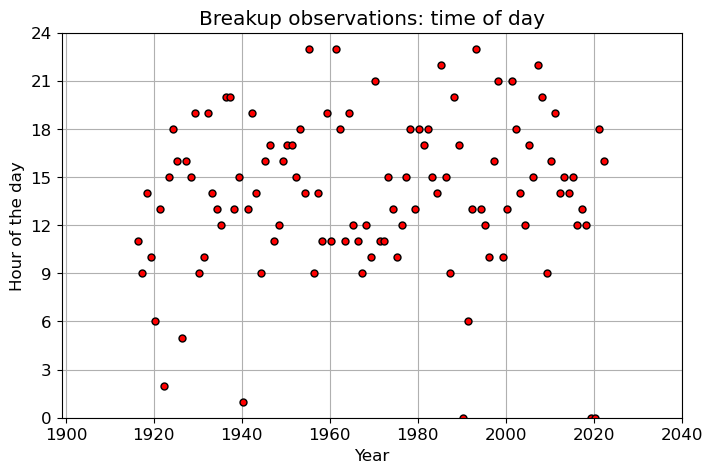

In [39]:
fig, axs = plt.subplots(figsize=(8, 5))

axs.plot(ice_data['datetime'], ice_data['datetime'].dt.hour,
         'o', markersize=5, color='red', markeredgecolor='black', label='Observations')

axs.set_xlim([datetime(1900, 1, 1), datetime(2040, 12, 31)])
axs.set_xticks(pd.date_range(start='1/1/1900', end='1/1/2060', freq='20Y'))
#format x labels as years using pandas
axs.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axs.set_ylim([0, 24])
axs.set_yticks(np.arange(0, 27, 3))

axs.grid(True)

axs.set_xlabel('Year')
axs.set_ylabel('Hour of the day')
axs.set_title('Breakup observations: time of day')
# axs.legend()
plt.rcParams.update({'font.size': 12})
plt.savefig('breakup_hour.png', dpi=300, bbox_inches='tight')


In [20]:
time_delta = (ice_data['datetime'] - ice_data['ref_date_annual'])
reference_date = datetime(year=2024, month=4, day=1, hour=0, minute=0)
reference_date + time_delta
# type(pd.Timedelta(1, "d"))

0     2024-04-30 11:30:00
1     2024-05-11 09:33:00
2     2024-05-03 14:33:00
3     2024-05-11 10:46:00
4     2024-05-11 06:42:00
              ...        
102   2024-04-14 12:21:00
103   2024-04-28 00:56:00
104   2024-05-01 00:50:00
105   2024-05-02 18:27:00
106   2024-05-08 16:01:00
Length: 107, dtype: datetime64[ns]

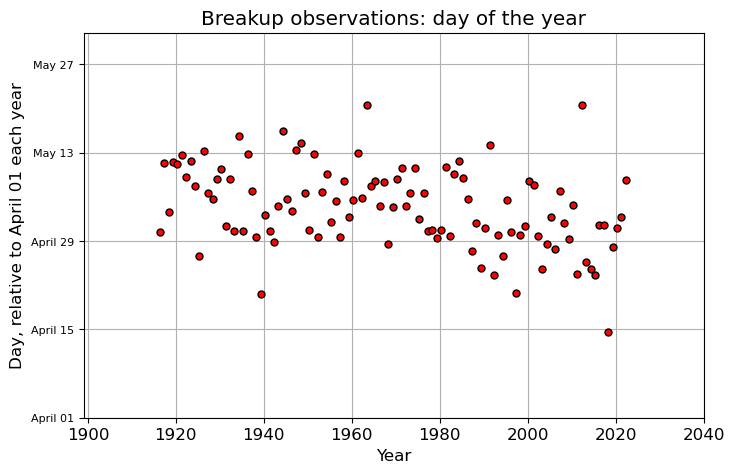

In [40]:
fig, axs = plt.subplots(figsize=(8, 5))

time_delta = (ice_data['datetime'] - ice_data['ref_date_annual'])
reference_date = datetime(year=2024, month=4, day=1, hour=0, minute=0)

axs.plot(ice_data['datetime'],
         reference_date + time_delta,
         'o', markersize=5, color='red', markeredgecolor='black', label='Observations')

axs.set_xlim([datetime(1900, 1, 1), datetime(2040, 12, 31)])
axs.set_xticks(pd.date_range(start='1/1/1900', end='1/1/2060', freq='20Y'))
axs.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

axs.set_ylim([datetime(2024, 4, 1), datetime(2024, 6, 1)])
axs.set_yticks(pd.date_range(start='4/1/2024', end='6/1/2024', freq='14d'))
axs.yaxis.set_major_formatter(mdates.DateFormatter('%B %d'))

# reduce font size of y axis labels
axs.tick_params(axis='y', labelsize=8)

axs.grid(True)



axs.set_xlabel('Year')
axs.set_ylabel(f'Day, relative to {reference_date:%B %d} each year')
axs.set_title('Breakup observations: day of the year')
# axs.legend()
plt.rcParams.update({'font.size': 12})
plt.savefig('breakup_day.png', dpi=300, bbox_inches='tight')


## Time Unit Type 1: Minutes from the Reference Date

The first two functions handle minutes data with respect to the `reference_date`.

In [4]:
date_to_minutes('4', '15', '10', '30')
date_to_minutes(4, 15, 10, 30)
date_to_minutes('4', '15', '10', '30', return_float=True)

Month 4 day 15 at time 10:30  corresponds to: 20790.0 minutes.
Month 4 day 15 at time 10:30  corresponds to: 20790.0 minutes.


20790.0

In [5]:
minutes_to_date(2000)

2000.0 minutes corresponds to: April 2 at 9:20.


It is always good to check that the functions work as expected. Here we check the `reference_date` and May 1.

In [6]:
date_to_minutes(4, 1, 0, 0)
minutes_to_date(date_to_minutes(4, 1, 0, 0, return_float=True))
minutes_to_date(date_to_minutes(5, 1, 0, 0, return_float=True))

Month 4 day 1 at time 0:0  corresponds to: 0.0 minutes.
0.0 minutes corresponds to: April 1 at 0:0.
43200.0 minutes corresponds to: May 1 at 0:0.


This cell illustrates how you can define your `data` as the minutes (DataFrame column `minutes`) since `reference_date` and fit a Normal distribution.

The empirical and fitted PDF's are also plotted.

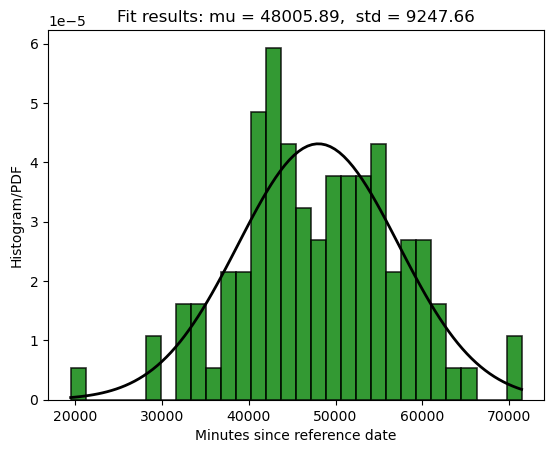

In [7]:
data = ice_data['minutes']

mu_min, std_min = norm.fit(data)
xmin, xmax = np.min(data), np.max(data)
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu_min, std_min)

plt.figure(1)
plt.hist(data, bins=30, density=True, alpha=0.8, color='g',
        stacked=True,  edgecolor='black', linewidth=1.2)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu_min, std_min)
plt.title(title)
plt.xlabel('Minutes since reference date')
plt.ylabel('Histogram/PDF')
plt.show()

Once the fit is done, the next step would be to calculate some probabilities using `prob_between_minutes`.

In [8]:
test_min_1 = 26670
test_min_2 = 26671
print(f'Function prob_between_floats returns type: ',
      f'{type(prob_between_floats(test_min_1, test_min_2, mu_min, std_min))}')
print(f'Probability between {test_min_1} min and {test_min_2} min',
      f'is {prob_between_floats(test_min_1, test_min_2, mu_min, std_min):.3e}')
prob_between_floats(test_min_1, test_min_2, mu_min, std_min)

Function prob_between_floats returns type:  <class 'numpy.float64'>
Probability between 26670 min and 26671 min is 3.013e-06


3.0133767392279825e-06

## Time Unit Type 2: Time During a Day

Similar to what you saw in the previous section, the same procedure can be applied to the minutes in the day; variable names here use the word `time` to distinguish between minutes from `reference_date` and minutes during a day. The function `minutes_to_time` again provides you with a transformation from minutes to hours and minutes, and the function `time_to_minutes` does the opposite.

In [9]:
minutes_to_time(875)

875.0 minutes corresponds to time 14:35.


In [10]:
time_to_minutes('14', '35')
time_to_minutes(14, 35)

Time 14:35 corresponds to: 875 minutes.
Time 14:35 corresponds to: 875 minutes.


A probability distribution is fit, as before.

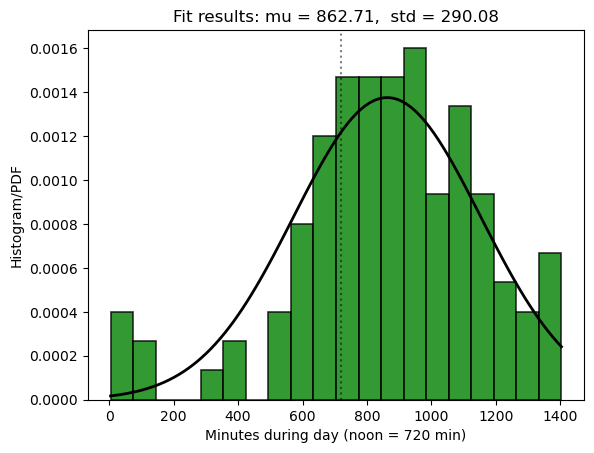

In [11]:
data = ice_data['minutes_in_day']

mu_time, std_time = norm.fit(data)
xmin, xmax = np.min(data), np.max(data)
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu_time, std_time)

plt.figure(1)
plt.hist(data, bins=20, density=True, alpha=0.8, color='g',
        stacked=True,  edgecolor='black', linewidth=1.2)
plt.plot(x, p, 'k', linewidth=2)
plt.axvline(x = 720, color = 'black', linestyle = ':', alpha = 0.5)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu_time, std_time)
plt.title(title)
plt.xlabel('Minutes during day (noon = 720 min)')
plt.ylabel('Histogram/PDF')
plt.show()

For this case the same function prob_between_minutes can be used. Try making you own guesses!

In [12]:
prob_between_floats(875, 876, mu_time, std_time)

0.0013739530758714036

## Time Unit Type 3: Days from the Reference Date

This example is similar to the first case, except `days` from the `reference_date` are used rather than minutes.

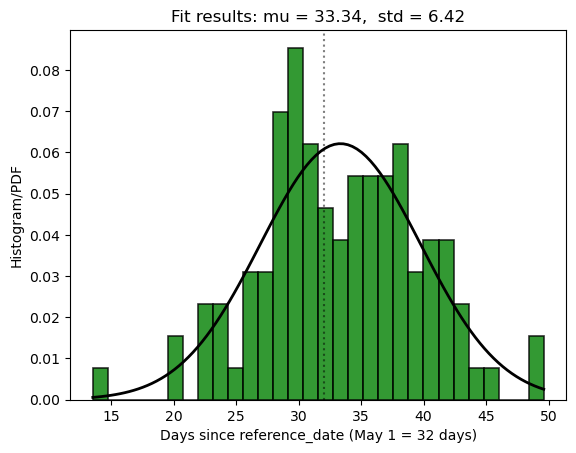

In [13]:
days = (ice_data['datetime'] - ice_data['ref_date_annual']).dt.total_seconds()/(60*60*24)
data = days

# Calculate the Gaussian fitted PDF
mu_time_as_day, std_time_as_day = norm.fit(data)
xmin, xmax = np.min(data), np.max(data)
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu_time_as_day, std_time_as_day)

plt.figure(1)
plt.hist(data, bins=30, density=True, alpha=0.8, color='g',
        stacked=True,  edgecolor='black', linewidth=1.2)
plt.plot(x, p, 'k', linewidth=2)
plt.axvline(x = 32, color = 'black', linestyle = ':', alpha = 0.5)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu_time_as_day, std_time_as_day)
plt.title(title)
plt.xlabel('Days since reference_date (May 1 = 32 days)')
plt.ylabel('Histogram/PDF')
plt.show()

Computing probability for a given day is easy, since the mean and standard deviation are found using days and the distribution is scaled automatically.

In [14]:
prob_between_floats(31, 32, mu_time_as_day, std_time_as_day)

0.05957474612596264

## Task 1: Compute a few warm-up probabilities

Use the functions illustrated above to complete the following tasks. First, another example for how you can define your guess for day and time


In [15]:
my_month = 4
my_day = 29
my_hour = 12
my_min = 30
prediction_min = date_to_minutes(my_month, my_day, my_hour, my_min,
                                 return_float=True)
prediction_min_in_day = time_to_minutes(my_hour, my_min,
                                        return_float=True)

date_to_minutes(my_month, my_day, my_hour, my_min)
time_to_minutes(my_hour, my_min)

Month 4 day 29 at time 12:30  corresponds to: 41070.0 minutes.
Time 12:30 corresponds to: 750 minutes.


<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Task 1.1:</b>  

Given a specific day, hour and minute, find the probability of being correct, assuming the Normal distribution.
</p>
</div>

In [16]:
p1 = prob_between_floats(prediction_min,
                         prediction_min+1,
                         mu_min, std_min)
print(f'Probability of my guess is: {p1:.3e}')

Probability of my guess is: 3.256e-05


<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Task 1.2:</b>  

Given a specific hour and minute in any day, find the probability of being correct, assuming the Normal distribution.
</p>
</div>

In [17]:
p2 = prob_between_floats(prediction_min_in_day,
                         prediction_min_in_day+1,
                         mu_time, std_time)
print(f'Probability of my guess is: {p2:.3e}')

Probability of my guess is: 1.276e-03


<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Task 1.3:</b>  

Given a specific day, find the probability of being correct, assuming the Normal distribution.
    
<em>Remember that no functions are provided for Type 3 time units, so if your guess is in May you will need to continue numbering from the 30th day in April (e.g., May 2 = day 32).</em>
</p>
</div>

In [18]:
p3 = prob_between_floats(my_day,
                         my_day+1,
                         mu_time_as_day,
                         std_time_as_day)
print(f'Probability of my guess is: {p3:.3e}')

Probability of my guess is: 5.193e-02


## Task 2: Compute the probability of your prediction!

Computing the probability that your prediction is correct is not as straightforward as choosing one of the methods above. It is actually related to system probability!

To find the probability of your prediction, you need to combine 2 of the 3 pieces used in Task 1.

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Task 2:</b>  

Compute the probability of your prediction being correct (you can assume the two "things" you need are independent).
</p>
</div>

<div style="background-color:#FAE99E; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%">
<p>
<b>Solution:</b>   

Type 1 is not good: it assumes time as a continuous across many days, however, from Type 2 it is clear that most break-up times happen in the early afternoon. To account for this we should separate the prediction probability into two parts: day and time of day, which is a combination of Type 2 and Type 3. The probability of our prediction being correct is the intersection of these two types of predictions being correct.
</p>
</div>

In [19]:
p_prediction = p2*p3
print(f'Probability of my prediction is: {p_prediction:.3e}')

Probability of my prediction is: 6.627e-05


**End of notebook.**
<h2 style="height: 60px">
</h2>
<h3 style="position: absolute; display: flex; flex-grow: 0; flex-shrink: 0; flex-direction: row-reverse; bottom: 60px; right: 50px; margin: 0; border: 0">
    <style>
        .markdown {width:100%; position: relative}
        article { position: relative }
    </style>
    <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">
      <img alt="Creative Commons License" style="border-width:; width:88px; height:auto; padding-top:10px" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" />
    </a>
    <a rel="TU Delft" href="https://www.tudelft.nl/en/ceg">
      <img alt="TU Delft" style="border-width:0; width:100px; height:auto; padding-bottom:0px" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png"/>
    </a>
    <a rel="MUDE" href="http://mude.citg.tudelft.nl/">
      <img alt="MUDE" style="border-width:0; width:100px; height:auto; padding-bottom:0px" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png"/>
    </a>
    
</h3>
<span style="font-size: 75%">
&copy; Copyright 2023 <a rel="MUDE Team" href="https://studiegids.tudelft.nl/a101_displayCourse.do?course_id=65595">MUDE Teaching Team</a> TU Delft. This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.